In [28]:
import requests
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from bs4 import BeautifulSoup

In [29]:
url = "https://gist.github.com/aishwarya8615/89d9f36fc014dea62487f7347864d16a"
df = pd.read_html(url)[0]
df

,Unnamed: 0,Country,Continent,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
0,NaN,Afghanistan,Asia,2015,Developing,65.0,263,62,0.01,71.279624,...,6.0,8.16,65,0.1,584.259210,33736494,17.2,17.3,0.479,10.1
1,NaN,Afghanistan,Asia,2014,Developing,59.9,271,64,0.01,73.523582,...,58.0,8.18,62,0.1,612.696514,327582,17.5,17.5,0.476,10.0
2,NaN,Afghanistan,Asia,2013,Developing,59.9,268,66,0.01,73.219243,...,62.0,8.13,64,0.1,631.744976,31731688,17.7,17.7,0.470,9.9
3,NaN,Afghanistan,Asia,2012,Developing,59.5,272,69,0.01,78.184215,...,67.0,8.52,67,0.1,669.959000,3696958,17.9,18.0,0.463,9.8
4,NaN,Afghanistan,Asia,2011,Developing,59.2,275,71,0.01,7.097109,...,68.0,7.87,68,0.1,63.537231,2978599,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2456,NaN,Zimbabwe,Africa,2004,Developing,44.3,723,27,4.36,0.000000,...,67.0,7.13,65,33.6,454.366654,12777511,9.4,9.4,0.407,9.2
2457,NaN,Zimbabwe,Africa,2003,Developing,44.5,715,26,4.06,0.000000,...,7.0,6.52,68,36.7,453.351155,12633897,9.8,9.9,0.418,9.5
2458,NaN,Zimbabwe,Africa,2002,Developing,44.8,73,25,4.43,0.000000,...,73.0,6.53,71,39.8,57.348340,125525,1.2,1.3,0.427,10.0
2459,NaN,Zimbabwe,Africa,2001,Developing,45.3,686,25,1.72,0.000000,...,76.0,6.16,75,42.1,548.587312,12366165,1.6,1.7,0.427,9.8


# Questão1

In [30]:
df['Status'].value_counts()

Status
Developing    2013
Developed      448
Name: count, dtype: int64

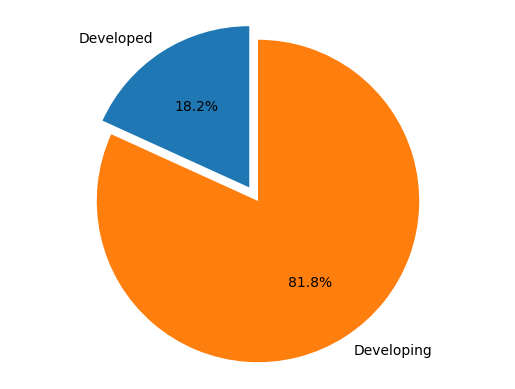

In [31]:
labels = ['Developed', 'Developing']
status_counts = df['Status'].value_counts()
sizes = [status_counts['Developed'], status_counts['Developing']]

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, explode = [0.1,0])
ax.axis('equal')

plt.show()

# Questão2

In [32]:
df['Life_expectancy']

0       65.0
1       59.9
2       59.9
3       59.5
4       59.2
        ... 
2456    44.3
2457    44.5
2458    44.8
2459    45.3
2460    46.0
Name: Life_expectancy, Length: 2461, dtype: float64

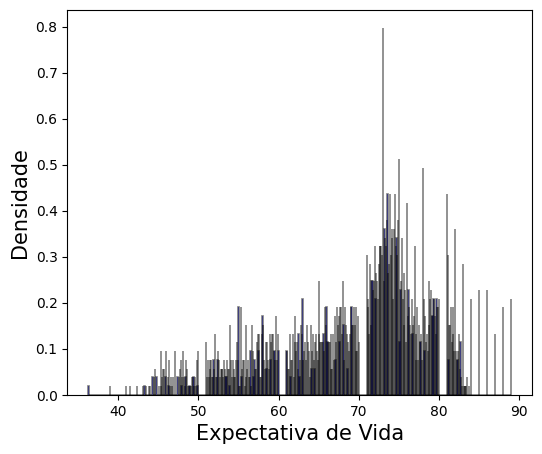

In [33]:
x = df['Life_expectancy']

fig= plt.figure(figsize=(6,5))

num_bins = len(x)
n, bins, patches = plt.hist(x, num_bins, facecolor='blue', alpha=0.5, density=True, edgecolor='black', linewidth=1.2)
plt.xlabel("Expectativa de Vida", fontsize = 15)
plt.ylabel("Densidade", fontsize = 15)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [34]:
media = df['Life_expectancy'].mean()
float(media)

69.46456724908573

In [35]:
variancia = df['Life_expectancy'].var()
float(variancia)

92.91774400980499

In [36]:
variancia = 0
for i in range(len(df['Life_expectancy'])):
    variancia = variancia + (df['Life_expectancy'][i] - media)**2
variancia = variancia / (len(df['Life_expectancy']) - 1)
float(variancia)

92.91774400980498

In [37]:
print(f"Resposta da questão 2: A média é {media} e a variância é {variancia}")

Resposta da questão 2: A média é 69.46456724908573 e a variância é 92.91774400980498


# Questão3

In [38]:
df = df[df['Country'].isin(['Ireland', 'Finland','Netherlands', 'Zambia', 'Angola'])]
df

,Unnamed: 0,Country,Continent,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
48,NaN,Angola,Africa,2015,Developing,52.4,335,66,0.00,0.000000,...,7.0,NaN,64,1.9,3695.793748,2785935,8.3,8.2,0.531,11.4
49,NaN,Angola,Africa,2014,Developing,51.7,348,67,8.33,23.965612,...,68.0,3.31,64,2.0,479.312240,2692466,8.5,8.3,0.527,11.4
50,NaN,Angola,Africa,2013,Developing,51.1,355,69,8.10,35.958573,...,67.0,4.26,77,2.3,484.616884,2599834,8.6,8.5,0.523,11.4
51,NaN,Angola,Africa,2012,Developing,56.0,358,72,8.24,256.122524,...,75.0,3.30,75,2.6,4598.249988,259615,8.8,8.6,0.508,10.3
52,NaN,Angola,Africa,2011,Developing,51.0,361,75,8.06,239.891392,...,73.0,3.38,71,2.5,4299.128890,24218565,8.9,8.8,0.495,9.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2440,NaN,Zambia,Africa,2004,Developing,47.9,578,36,2.46,8.369852,...,84.0,7.33,83,17.6,53.277222,11731746,7.2,7.1,0.456,10.5
2441,NaN,Zambia,Africa,2003,Developing,46.4,64,39,2.33,65.789974,...,85.0,8.18,83,18.2,429.158343,11421984,7.3,7.2,0.443,10.2
2442,NaN,Zambia,Africa,2002,Developing,45.5,69,41,2.44,54.043480,...,85.0,6.93,84,18.4,377.135244,111249,7.4,7.3,0.433,10.0
2443,NaN,Zambia,Africa,2001,Developing,44.6,611,43,2.61,46.830275,...,86.0,6.56,85,18.6,378.273624,1824125,7.4,7.4,0.424,9.8


In [39]:
df['Life_expectancy']

48      52.4
49      51.7
50      51.1
51      56.0
52      51.0
        ... 
2440    47.9
2441    46.4
2442    45.5
2443    44.6
2444    43.8
Name: Life_expectancy, Length: 80, dtype: float64

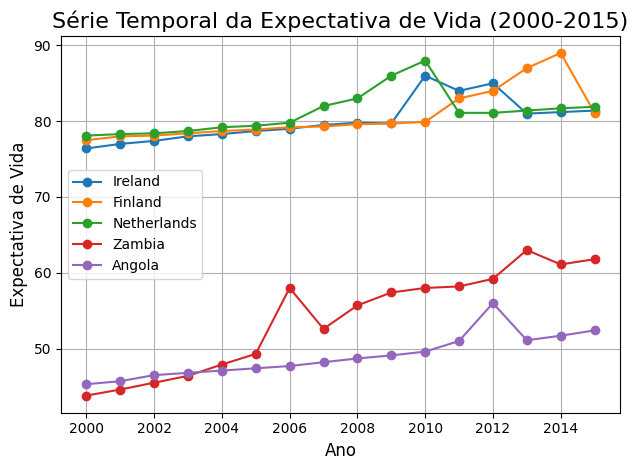

In [40]:
for pais in ['Ireland', 'Finland','Netherlands', 'Zambia', 'Angola']:

    newdf = df[df['Country'] == pais]
    newdf = newdf.sort_values('Year')
    plt.plot(newdf['Year'], newdf['Life_expectancy'], marker='o', linestyle='-', label=pais)


plt.title('Série Temporal da Expectativa de Vida (2000-2015)', fontsize=16)
plt.xlabel('Ano', fontsize=12)
plt.ylabel('Expectativa de Vida', fontsize=12)
plt.grid(True) 
plt.legend()
plt.tight_layout()
plt.show()

In [41]:
df_2014 = df[df['Year'].isin([2014])]
df_2014

,Unnamed: 0,Country,Continent,Year,Status,Life_expectancy,Adult_Mortality,infant_deaths,Alcohol,percentage_expenditure,...,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income_composition_of_resources,Schooling
49,NaN,Angola,Africa,2014,Developing,51.7,348,67,8.33,23.965612,...,68.0,3.31,64,2.0,479.31224,2692466,8.5,8.3,0.527,11.4
781,NaN,Finland,Europe,2014,Developing,89.0,78,0,8.80,6164.455402,...,98.0,9.68,98,0.1,49914.61864,5461512,0.9,0.8,0.890,17.0
1081,NaN,Ireland,Europe,2014,Developed,81.2,66,0,10.75,746.367045,...,96.0,7.78,96,0.1,5553.32623,4617225,0.3,0.2,0.910,18.6
1605,NaN,Netherlands,Europe,2014,Developed,81.7,58,1,0.01,1491.703605,...,96.0,1.90,96,0.1,52157.46870,168658,1.0,0.9,0.923,18.1
2430,NaN,Zambia,Africa,2014,Developing,61.1,314,28,0.01,196.667577,...,78.0,4.99,86,4.3,1738.88220,1562974,6.3,6.2,0.570,12.5


In [42]:
maxval = df_2014['Life_expectancy'].idxmax()
minval = df_2014['Life_expectancy'].idxmin()
countrymax = df['Country'][maxval]
countrymin = df['Country'][minval]
print(f"Resposta da questão 3: O país com a maior expectativa de vida, em 2014, foi {countrymax} e a de menor foi {countrymin}")

Resposta da questão 3: O país com a maior expectativa de vida, em 2014, foi Finland e a de menor foi Angola


# Questão4

In [43]:
medianas = {}
for pais in ['Ireland', 'Finland','Netherlands', 'Zambia', 'Angola']: 
    medianas[pais] = float(df['Schooling'][df['Country'].isin([pais])].median())
medianas

{'Ireland': 17.75,
 'Finland': 17.1,
 'Netherlands': 16.85,
 'Zambia': 11.25,
 'Angola': 7.9}

In [44]:
maxval = max(medianas, key=medianas.get)
print(f"Resposta da questão 4: O país com a maior mediana de escolaridade é {maxval}")

Resposta da questão 4: O país com a maior mediana de escolaridade é Ireland


# Questão5

In [45]:
url = "https://www.worldometers.info/world-population/population-by-country/"

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64; rv:98.0) Gecko/20100101 Firefox/98.0'
}
response = requests.get(url, headers=headers)

# Send a GET request to the URL
response = requests.get(url)
# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')
# Find the table containing the population data

table = soup.find('table')
#table = soup.find('table', {'id': 'example2'})

# Convert the table to a Pandas DataFrame
df = pd.read_html(str(table))[0]
# Print the DataFrame
df.head()

/tmp/ipykernel_14430/2931287636.py:18: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  df = pd.read_html(str(table))[0]


,#,Country (or dependency),Population 2025,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Median Age,Urban Pop %,World Share
0,1,India,1463865525,0.89%,12929734,492,2973190,"−495,753",1.94,28.8,37.1%,17.78%
1,2,China,1416096094,−0.23%,"−3,225,184",151,9388211,"−268,126",1.02,40.1,67.5%,17.20%
2,3,United States,347275807,0.54%,1849236,38,9147420,1230663,1.62,38.5,82.8%,4.22%
3,4,Indonesia,285721236,0.79%,2233305,158,1811570,"−39,509",2.10,30.4,59.6%,3.47%
4,5,Pakistan,255219554,1.57%,3950390,331,770880,"−1,235,336",3.50,20.6,34.4%,3.10%


In [46]:
df.dtypes

#                            int64
Country (or dependency)     object
Population 2025              int64
Yearly Change               object
Net Change                  object
Density (P/Km²)              int64
Land Area (Km²)              int64
Migrants (net)              object
Fert. Rate                 float64
Median Age                 float64
Urban Pop %                 object
World Share                 object
dtype: object

In [47]:
df = df.drop(['#', 'Country (or dependency)'], axis=1)
df

,Population 2025,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Median Age,Urban Pop %,World Share
0,1463865525,0.89%,12929734,492,2973190,"−495,753",1.94,28.8,37.1%,17.78%
1,1416096094,−0.23%,"−3,225,184",151,9388211,"−268,126",1.02,40.1,67.5%,17.20%
2,347275807,0.54%,1849236,38,9147420,1230663,1.62,38.5,82.8%,4.22%
3,285721236,0.79%,2233305,158,1811570,"−39,509",2.10,30.4,59.6%,3.47%
4,255219554,1.57%,3950390,331,770880,"−1,235,336",3.50,20.6,34.4%,3.10%
...,...,...,...,...,...,...,...,...,...,...
228,4359,−0.68%,−30,44,100,−9,1.45,41.6,11.5%,0.000053%
229,3469,−0.03%,−1,0,12170,−17,1.70,42.8,68%,0.000042%
230,2608,4.07%,102,261,10,53,2.57,27.3,NaN,0.000032%
231,1821,0.11%,2,7,260,3,2.46,35.7,44.5%,0.000022%


In [48]:
cols_percent = ['Yearly Change', 'Urban Pop %', 'World Share']
for col in cols_percent:
    df[col] = df[col].astype(str).str.replace('%', '').str.strip()
    df[col] = pd.to_numeric(df[col], errors='coerce')
df

,Population 2025,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Median Age,Urban Pop %,World Share
0,1463865525,0.89,12929734,492,2973190,"−495,753",1.94,28.8,37.1,17.780000
1,1416096094,NaN,"−3,225,184",151,9388211,"−268,126",1.02,40.1,67.5,17.200000
2,347275807,0.54,1849236,38,9147420,1230663,1.62,38.5,82.8,4.220000
3,285721236,0.79,2233305,158,1811570,"−39,509",2.10,30.4,59.6,3.470000
4,255219554,1.57,3950390,331,770880,"−1,235,336",3.50,20.6,34.4,3.100000
...,...,...,...,...,...,...,...,...,...,...
228,4359,NaN,−30,44,100,−9,1.45,41.6,11.5,0.000053
229,3469,NaN,−1,0,12170,−17,1.70,42.8,68.0,0.000042
230,2608,4.07,102,261,10,53,2.57,27.3,NaN,0.000032
231,1821,0.11,2,7,260,3,2.46,35.7,44.5,0.000022


In [49]:
cols_special_char = ['Net Change', 'Migrants (net)']
for col in cols_special_char:
    df[col] = df[col].astype(str).str.replace(',', '').str.replace('−', '-')
    df[col] = pd.to_numeric(df[col], errors='coerce')
df

,Population 2025,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Median Age,Urban Pop %,World Share
0,1463865525,0.89,12929734,492,2973190,-495753,1.94,28.8,37.1,17.780000
1,1416096094,NaN,-3225184,151,9388211,-268126,1.02,40.1,67.5,17.200000
2,347275807,0.54,1849236,38,9147420,1230663,1.62,38.5,82.8,4.220000
3,285721236,0.79,2233305,158,1811570,-39509,2.10,30.4,59.6,3.470000
4,255219554,1.57,3950390,331,770880,-1235336,3.50,20.6,34.4,3.100000
...,...,...,...,...,...,...,...,...,...,...
228,4359,NaN,-30,44,100,-9,1.45,41.6,11.5,0.000053
229,3469,NaN,-1,0,12170,-17,1.70,42.8,68.0,0.000042
230,2608,4.07,102,261,10,53,2.57,27.3,NaN,0.000032
231,1821,0.11,2,7,260,3,2.46,35.7,44.5,0.000022


In [50]:
correlation = df.corr()
correlation

,Population 2025,Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Median Age,Urban Pop %,World Share
Population 2025,1.000000,-0.042425,0.526859,-0.025402,0.448457,-0.184488,-0.032182,-0.013868,-0.036269,0.999999
Yearly Change,-0.042425,1.000000,0.153312,-0.121136,-0.042741,0.074912,0.747059,-0.668436,-0.270683,-0.042364
Net Change,0.526859,0.153312,1.000000,-0.029006,0.087969,-0.141983,0.261235,-0.272475,-0.196212,0.526909
Density (P/Km²),-0.025402,-0.121136,-0.029006,1.000000,-0.058213,-0.008571,-0.125565,0.181592,0.126356,-0.025432
Land Area (Km²),0.448457,-0.042741,0.087969,-0.058213,1.000000,0.075890,-0.019433,0.017698,0.126706,0.448633
Migrants (net),-0.184488,0.074912,-0.141983,-0.008571,0.075890,1.000000,-0.113587,0.130136,0.174233,-0.184512
Fert. Rate,-0.032182,0.747059,0.261235,-0.125565,-0.019433,-0.113587,1.000000,-0.854768,-0.463326,-0.032085
Median Age,-0.013868,-0.668436,-0.272475,0.181592,0.017698,0.130136,-0.854768,1.000000,0.453004,-0.013943
Urban Pop %,-0.036269,-0.270683,-0.196212,0.126356,0.126706,0.174233,-0.463326,0.453004,1.000000,-0.036274
World Share,0.999999,-0.042364,0.526909,-0.025432,0.448633,-0.184512,-0.032085,-0.013943,-0.036274,1.000000


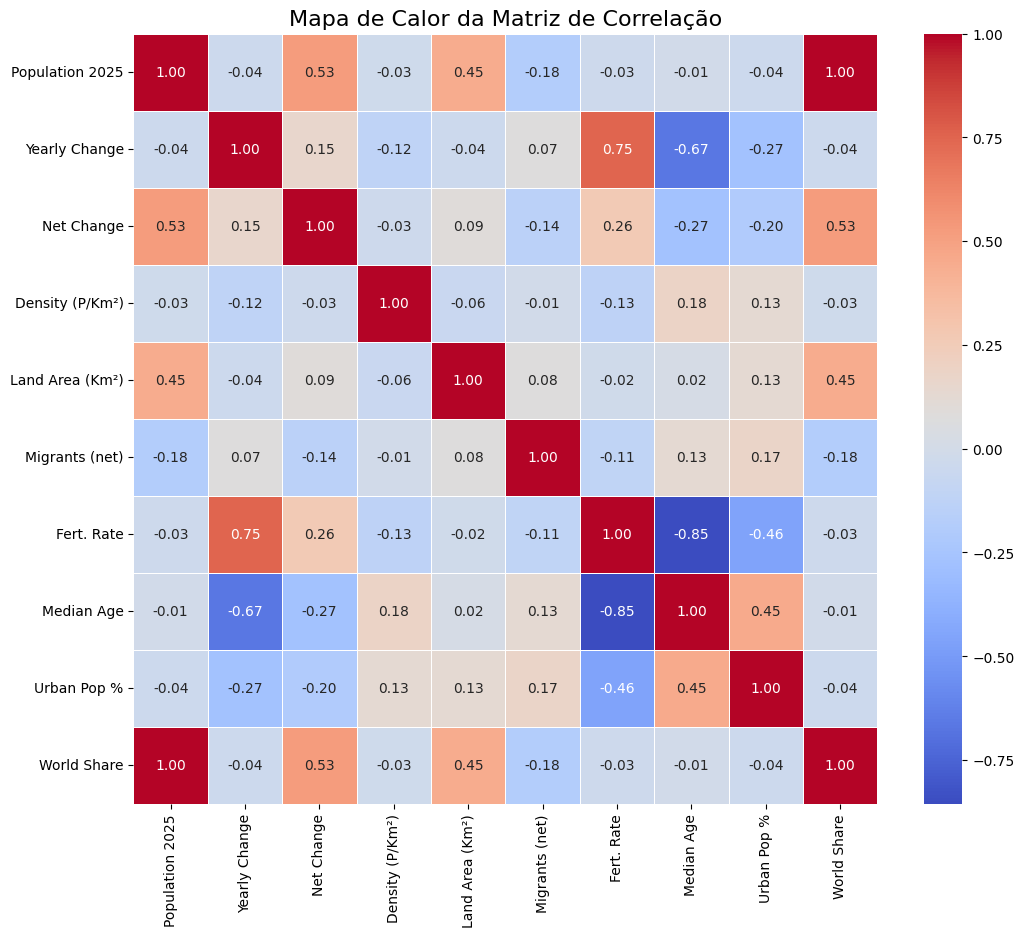

In [51]:
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
plt.title('Mapa de Calor da Matriz de Correlação', fontsize=16)
plt.show()